In [6]:
import json

# Load the JSON file
with open("./sarcasm.json", 'r') as f:
    datastore = json.load(f)

# Initialize the lists
sentences = []
labels = []

# Collect sentences and labels into the lists
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [7]:
# Number of examples to use for training
training_size = 20000

# Vocabulary size of the tokenizer
vocab_size = 10000

# Maximum length of the padded sequences
max_length = 32

# Output dimensions of the Embedding layer
embedding_dim = 16

'''
Veri kümesini böl
Ardından, tren ve test veri kümelerinizi oluşturacaksınız.
Cümleleri ve etiket listelerini iki alt listeye ayırmak için
yukarıda belirlediğiniz training_size değerini kullanacaksınız:
biri eğitim için diğeri test için.
'''

# Split the sentences
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

# Split the labels
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

'''
Tren ve test setlerinin ön işlemesi
Artık metni ve etiketleri, model tarafından tüketilebilmesi için
önceden işleyebilirsiniz. Sözcük dağarcığını oluşturmak için Tokenizer
sınıfını ve dolgulu belirteç dizileri oluşturmak için pad_sequences
yöntemini kullanırsınız. Ayrıca, model için geçerli bir veri türü
olabilmesi için etiketleri bir numpy dizisine ayarlamanız gerekecektir.
model.fit().
'''

import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters for padding and OOV tokens
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)




In [8]:
'''
Modeli Oluşturun ve Derleyin
Ardından, modeli oluşturacaksınız. Mimari önceki laboratuara benzer,
ancak Yerleştirmeden sonra Düzleştirmek yerine Küresel Bir Ortalama
Havuzlama 1D katmanı kullanacaksınız. Bu, yoğun katmanlara bağlanmadan
önce sıra boyutunun ortalamasını alma görevini ekler. Aşağıdaki pasajı
kullanarak bunun nasıl çalıştığına dair kısa bir demoya bakın. 3 Dizinin
ortalamasını aldığına dikkat edin
(yani10 + 1 + 1 ) / 3 ve (2 + 3 + 1 ) / 3 nihai çıktıya ulaşmak için.
'''

import tensorflow as tf

# Initialize a GlobalAveragePooling1D (GAP1D) layer
gap1d_layer = tf.keras.layers.GlobalAveragePooling1D()

# Define sample array
sample_array = np.array([[[10,2],[1,3],[1,1]]])

# Print shape and contents of sample array
print(f'shape of sample_array = {sample_array.shape}')
print(f'sample array: {sample_array}')

# Pass the sample array to the GAP1D layer
output = gap1d_layer(sample_array)

# Print shape and contents of the GAP1D output array
print(f'output shape of gap1d_layer: {output.shape}')
print(f'output array of gap1d_layer: {output.numpy()}')

shape of sample_array = (1, 3, 2)
sample array: [[[10  2]
  [ 1  3]
  [ 1  1]]]
output shape of gap1d_layer: (1, 2)
output array of gap1d_layer: [[4 2]]


In [9]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 32, 16)            160000    
                                                                 
 global_average_pooling1d_3   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 24)                408       
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

num_epochs = 30

# Train the model
history = model.fit(training_padded, 
                    training_labels, 
                    epochs=num_epochs, 
                    validation_data=(testing_padded, testing_labels), 
                    verbose=2)



Epoch 1/30
625/625 - 1s - loss: 0.5710 - accuracy: 0.6985 - val_loss: 0.3999 - val_accuracy: 0.8347 - 1s/epoch - 2ms/step
Epoch 2/30
625/625 - 1s - loss: 0.3137 - accuracy: 0.8725 - val_loss: 0.3463 - val_accuracy: 0.8490 - 642ms/epoch - 1ms/step
Epoch 3/30
625/625 - 1s - loss: 0.2360 - accuracy: 0.9082 - val_loss: 0.3432 - val_accuracy: 0.8583 - 655ms/epoch - 1ms/step
Epoch 4/30
625/625 - 1s - loss: 0.1901 - accuracy: 0.9265 - val_loss: 0.3612 - val_accuracy: 0.8506 - 637ms/epoch - 1ms/step
Epoch 5/30
625/625 - 1s - loss: 0.1583 - accuracy: 0.9408 - val_loss: 0.3854 - val_accuracy: 0.8526 - 644ms/epoch - 1ms/step
Epoch 6/30
625/625 - 1s - loss: 0.1330 - accuracy: 0.9527 - val_loss: 0.4186 - val_accuracy: 0.8483 - 633ms/epoch - 1ms/step
Epoch 7/30
625/625 - 1s - loss: 0.1143 - accuracy: 0.9603 - val_loss: 0.4590 - val_accuracy: 0.8445 - 627ms/epoch - 1ms/step
Epoch 8/30
625/625 - 1s - loss: 0.0981 - accuracy: 0.9672 - val_loss: 0.5038 - val_accuracy: 0.8426 - 631ms/epoch - 1ms/step
Epo

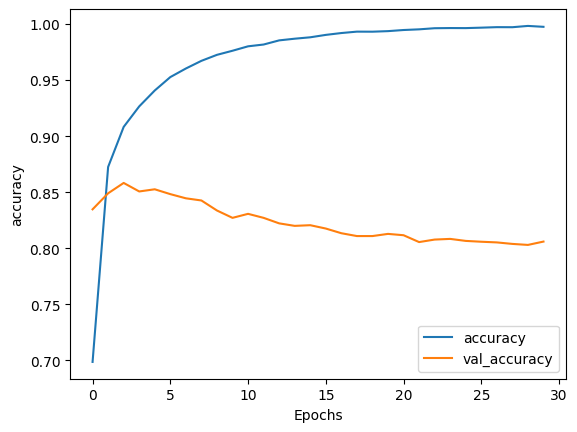

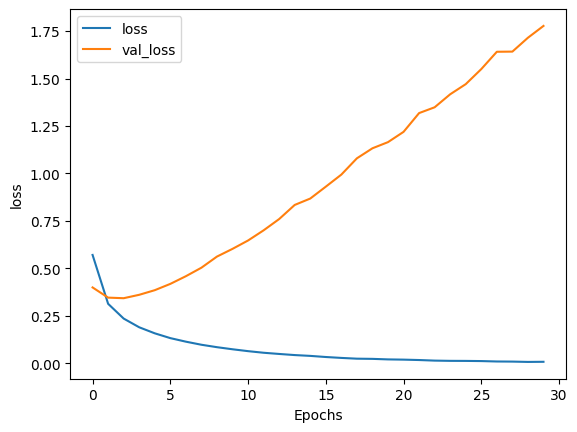

In [11]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
  
# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")